#### Datasets required:

`modis_ctt_ctp.nc`; `era5_case_study.nc`; `ds_era5_vars.nc`; `ds_era5_flux.nc`


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import time
import cmocean.cm as cmo
from functions import plot_params
import numpy as np

import cartopy
import cartopy.crs as ccrs
import matplotlib.path as mpath
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# load the relevant day for the storm analysis

ds = xr.open_dataset('../../data/satellite_ctp/processed/modis_ctt_ctp.nc')

In [3]:
# load era5 data that covers the vast array of the atlantic ocean

# era5 = xr.open_mfdataset('/Volumes/LaCie/Work/data/era5/DJFM_2018_19_hourly_means/*201901.nc').load()

# era5_day = era5.sel(time='2019-01-04T20:00:00')

# era5_day.to_netcdf('../../data/era5/era5_case_study.nc')

In [4]:
# load era5 data for the case study

era5_day = xr.open_dataset('../../data/era5/era5_case_study.nc')

/Users/xduplm/opt/anaconda3/envs/storms_env/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/xduplm/opt/anaconda3/envs/storms_env/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/xduplm/opt/anaconda3/envs/storms_env/lib/python3.11/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


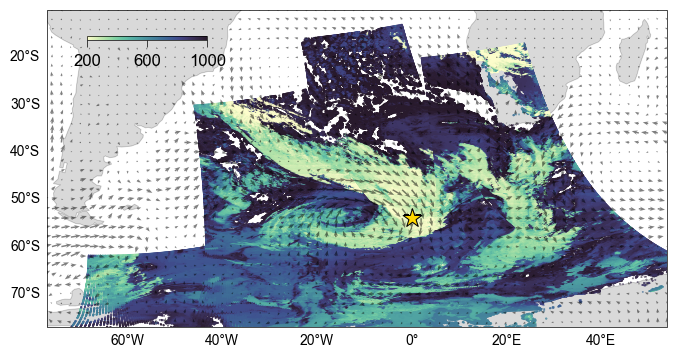

In [7]:
# plot the cloud top pressure

fig = plt.figure(figsizae=[8, 4.5])

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

data = ds['Cloud_Top_Pressure']

day=str(ds.time[0].values)[:10]

t = time.time()
img = ax.scatter(ds['lon'], ds['lat'], s=0.1, c=data, cmap=cmo.deep, vmin=200, vmax=1000, transform=ccrs.PlateCarree())
elapsed = time.time() - t

ax.set_extent([-77, 54, -77, -10], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black', color='0.85')
ax.add_feature(cfeature.COASTLINE, zorder=0, color='0.6', linewidth=0.25)

skip=8

ax.quiver(era5_day.longitude[::skip], era5_day.latitude[::skip], 
          era5_day.u10[::skip, ::skip], era5_day.v10[::skip, ::skip],
          scale=1e3, zorder=10, alpha=0.5, headlength=4, headaxislength=3
          )

# Set gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='-')

# Customize gridlines
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

# Set gridline intervals to 10 degrees
gl.xlocator = plt.FixedLocator(range(-60, 60, 20))
gl.ylocator = plt.FixedLocator(range(-70, 0, 10))
gl.ylabel_padding = 16  # Adjust the padding as needed

cax = fig.add_axes([0.175, 0.78, 0.15, 0.01])

cb = plt.colorbar(mappable=img, cax=cax, orientation='horizontal')
cb.ax.tick_params(length=5)

# Set specific tick locations
tick_locations = [200, 600, 1000]
cb.set_ticks(tick_locations)

ax.scatter(0, -54, s=200, marker='*', c='gold', edgecolor='k', lw=0.75, zorder=120, transform=ccrs.PlateCarree())


plt.savefig('../../figs/figure-3a.png', dpi=300)


/Users/xduplm/opt/anaconda3/envs/storms_env/lib/python3.11/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


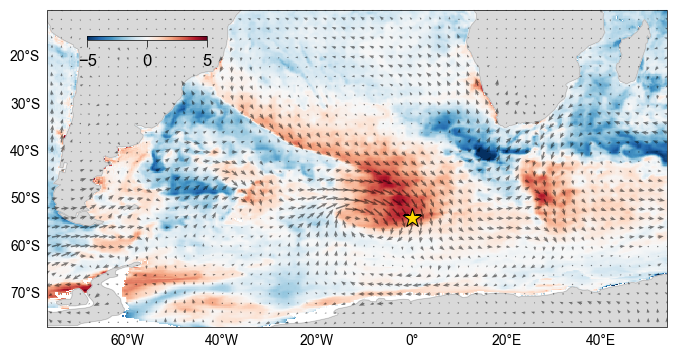

In [8]:
# era5 delta sst-airtemp

fig = plt.figure(figsize=[8, 4.5])

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, zorder=2, edgecolor='black', color='0.85')
ax.add_feature(cfeature.COASTLINE, zorder=2, color='0.6', linewidth=0.25)

skip=8

ax.quiver(era5_day.longitude[::skip], era5_day.latitude[::skip], 
          era5_day.u10[::skip, ::skip], era5_day.v10[::skip, ::skip],
          scale=1e3, zorder=10, alpha=0.5, headlength=4, headaxislength=3
          )

# Set gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='-')

# Customize gridlines
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

# Set gridline intervals to 10 degrees
gl.xlocator = plt.FixedLocator(range(-60, 60, 20))
gl.ylocator = plt.FixedLocator(range(-70, 0, 10))

ax.set_extent([-77, 54, -77, -10], crs=ccrs.PlateCarree())

img = ax.pcolormesh(era5_day.longitude, era5_day.latitude, (era5_day.t2m-era5_day.sst), cmap='RdBu_r', vmin=-5, vmax=5)

cax = fig.add_axes([0.175, 0.78, 0.15, 0.01])

cb = plt.colorbar(mappable=img, cax=cax, orientation='horizontal')
cb.ax.tick_params(length=5)

ax.scatter(0, -54, s=200, marker='*', c='gold', edgecolor='k', lw=0.75, zorder=120, transform=ccrs.PlateCarree())

plt.savefig('../../figs/figure-3b.png', dpi=300)


In [9]:
# load era5 data that covers a smaller array of the atlantic ocean 

ds_era5_vars = xr.open_dataset('/Users/xduplm/Google Drive/My Drive/data/duplessis-storms-paper/ERA5/ds_era5_vars.nc').load()
ds_era5_flux = xr.open_dataset('/Users/xduplm/Google Drive/My Drive/data/duplessis-storms-paper/ERA5/ds_era5_flux.nc').load()

print('merging')

ds_era5_atl = xr.merge([ds_era5_vars, ds_era5_flux])

merging


In [10]:
# determine the day of year variable for the various datasets

import matplotlib.dates as mdates

day0=mdates.date2num(np.datetime64('2019-01-01 00:00:00'))

In [26]:
# process the era5 dataset

ds_era5_atl['sp'] = (('time', 'latitude', 'longitude'), ds_era5_atl['sp'].data/100)

ds_era5_atl['wnd'] = (('time', 'latitude', 'longitude'), np.sqrt(ds_era5_atl['u10']**2 + ds_era5_atl['v10']**2).data)

ds_era5_site = ds_era5_atl.sel(longitude=0, latitude=-54)

import matplotlib.dates as mdates

ds_era5_site['DOY']=(('time'), mdates.date2num(ds_era5_site.time)-day0)

ds_era5_site['qnet'] = (('time'), ds_era5_site['sshf'].data + ds_era5_site['slhf'].data + ds_era5_site['str'].data + ds_era5_site['ssr'].data)

ds_era5_site['sthf'] = (('time'), ds_era5_site.sshf.data + ds_era5_site.slhf.data)

import functions.dewpoint_to_rh as dp2rh

ds_era5_site = dp2rh.convert_dp_to_rh(ds_era5_site)

ds_era5_site['dt'] = (('time'), ds_era5_site['t2m'].data - ds_era5_site['sst'].data)

sl_xld = xr.open_dataset('../../data/slocum/slocum_xld.nc')

ds_era5_site = ds_era5_site.sel(time=slice(sl_xld.time.data[0], sl_xld.time.data[-1]))


In [27]:
from functions.wind_direction_from_uv import wind_direction

wd = [wind_direction(ds_era5_site.v10.data[i], ds_era5_site.u10.data[i]) for i in range(ds_era5_site.time.size)]

ds_era5_site['wnd_dir'] = (('time'), np.array(wd))

In [29]:
# identify storms

from functions.id_storms import id_storms

ds_era5_site, merged_storms = id_storms(ds_era5_site, wind_var='wnd')

ds_storms = ds_era5_site.isel(time=ds_era5_site.storms==1)
ds_non_storms = ds_era5_site.isel(time=ds_era5_site.storms==0)

In [30]:
# calculate the specific humidity

from functions.calculate_specific_humidity import calculate_specific_humidity

ds_storms['sh'] = (('time'), calculate_specific_humidity(ds_storms['t2m'].data-273.15, ds_storms['rh'].data))
ds_non_storms['sh'] = (('time'), calculate_specific_humidity(ds_non_storms['t2m'].data-273.15, ds_non_storms['rh'].data))

In [33]:
# calculate fluxes in 20 degree wind directions bins

# remove known warnings 

import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

def calculate_stats(ds, var, wind_dir_grid):

    mean_data = []
    std_data = []

    for i, val in enumerate(wind_dir_grid):

        idx = ((ds.wnd_dir.data > val) & (ds.wnd_dir.data < val + 20))

        mean_data += np.mean(ds[var].data[idx]),
        #std_data += np.std(ds[var].data[idx]),
        std_data += np.std(ds[var].data[idx]) / np.sqrt(len(ds[var].data[idx])),

    return np.array(mean_data), np.array(std_data)

wind_dir_grid = np.arange(0, 380, 20)

shf_mean_wnd_dir_storm, shf_std_wnd_dir_storm = calculate_stats(ds_storms, 'sshf', wind_dir_grid)
lhf_mean_wnd_dir_storm, lhf_std_wnd_dir_storm = calculate_stats(ds_storms, 'slhf', wind_dir_grid)
thf_mean_wnd_dir_storm, thf_std_wnd_dir_storm = calculate_stats(ds_storms, 'sthf', wind_dir_grid)
str_mean_wnd_dir_storm, str_std_wnd_dir_storm = calculate_stats(ds_storms, 'str',  wind_dir_grid)
ssr_mean_wnd_dir_storm, ssr_std_wnd_dir_storm = calculate_stats(ds_storms, 'ssr',  wind_dir_grid)
wnd_mean_wnd_dir_storm, wnd_std_wnd_dir_storm = calculate_stats(ds_storms, 'wnd',  wind_dir_grid)
sh_mean_wnd_dir_storm,  sh_std_wnd_dir_storm  = calculate_stats(ds_storms, 'sh',   wind_dir_grid)
dt_mean_wnd_dir_storm,  dt_std_wnd_dir_storm  = calculate_stats(ds_storms, 'dt',   wind_dir_grid)

shf_mean_wnd_dir_non_storm, shf_std_wnd_dir_non_storm = calculate_stats(ds_non_storms, 'sshf', wind_dir_grid)
lhf_mean_wnd_dir_non_storm, lhf_std_wnd_dir_non_storm = calculate_stats(ds_non_storms, 'slhf', wind_dir_grid)
thf_mean_wnd_dir_non_storm, thf_std_wnd_dir_non_storm = calculate_stats(ds_non_storms, 'sthf', wind_dir_grid)
str_mean_wnd_dir_non_storm, str_std_wnd_dir_non_storm = calculate_stats(ds_non_storms, 'str',  wind_dir_grid)
ssr_mean_wnd_dir_non_storm, ssr_std_wnd_dir_non_storm = calculate_stats(ds_non_storms, 'ssr',  wind_dir_grid)
wnd_mean_wnd_dir_non_storm, wnd_std_wnd_dir_non_storm = calculate_stats(ds_non_storms, 'wnd',  wind_dir_grid)
sh_mean_wnd_dir_non_storm,  sh_std_wnd_dir_non_storm  = calculate_stats(ds_non_storms, 'sh',   wind_dir_grid)
dt_mean_wnd_dir_non_storm,  dt_std_wnd_dir_non_storm  = calculate_stats(ds_non_storms, 'dt',   wind_dir_grid)

In [ ]:
# figure 3c

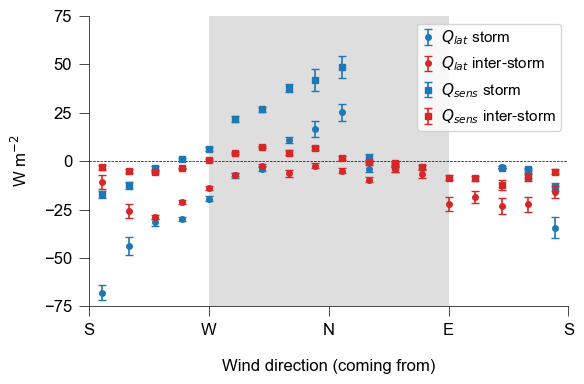

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# add northerly wind shading
ax.fill_betweenx(x1=90, x2=270, y=[-75, 75], facecolor='0.75', zorder=0, alpha=0.5)

ms = 4
cs = 3

# Latent heat flux
ax.errorbar(wind_dir_grid + 10, lhf_mean_wnd_dir_storm, yerr=lhf_std_wnd_dir_storm, linestyle='None', marker='o', markersize=ms, capsize=cs, zorder=0, color='tab:blue', label='$Q_{lat}$ storm')
ax.errorbar(wind_dir_grid + 10, lhf_mean_wnd_dir_non_storm, yerr=lhf_std_wnd_dir_non_storm, linestyle='None', marker='o', markersize=ms, capsize=cs, color='tab:red', label='$Q_{lat}$ inter-storm')

# Sensible heat flux
ax.errorbar(wind_dir_grid + 10, shf_mean_wnd_dir_storm, yerr=shf_std_wnd_dir_storm, linestyle='None', marker='s', markersize=ms, capsize=cs, zorder=0, color='tab:blue', label='$Q_{sens}$ storm', alpha=1)
ax.errorbar(wind_dir_grid + 10, shf_mean_wnd_dir_non_storm, yerr=shf_std_wnd_dir_non_storm, linestyle='None', marker='s', markersize=ms, capsize=cs, color='tab:red', label='$Q_{sens}$ inter-storm', alpha=1)

# Set axis limits and ticks
ax.set_ylim(-75, 75)
ax.set_xlim(0, 360)
ax.yaxis.set_ticks(np.arange(-75, 100, 25))
ax.xaxis.set_ticks([0, 90, 180, 270, 360])
ax.xaxis.set_ticklabels(['S', 'W', 'N', 'E', 'S'])
ax.set_xlabel('Wind direction (coming from)', labelpad=15)
ax.set_ylabel('W m$^{-2}$', labelpad=10)

# Customize legend
ax.legend(fontsize=11, ncol=1, frameon=True, loc='upper right', bbox_to_anchor=(1, 1.0), handlelength=0.8, handletextpad=0.5, borderpad=0.3)

# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add a horizontal dashed line
ax.axhline(c='k', zorder=0, ls='--', lw=0.5)

# Adjust layout and save figure
fig.tight_layout()

plt.savefig('../../figs/figure-3c.png', dpi=300)



In [35]:
# figure 3d

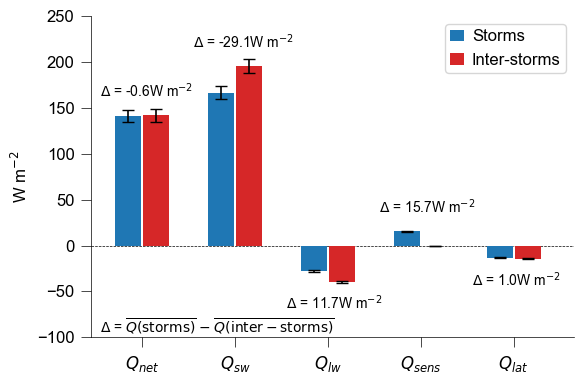

In [36]:
# bar chart showing the storm - interstorm comparisons

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 4))

# net heat flux
variables = ['qnet', 'ssr', 'str', 'sshf', 'slhf']
x_positions = [0, 5, 10, 15, 20]

def plot_bars(var, x, ax):
    x2 = x + 1.5

    se_storms = ds_storms[var].std() / np.sqrt(ds_storms[var].size)
    se_non_storms = ds_non_storms[var].std() / np.sqrt(ds_non_storms[var].size)

    ax.bar(x, ds_storms[var].mean(), facecolor='tab:blue', label='Storms', zorder=5, width=1.4, yerr=se_storms, capsize=4)
    ax.bar(x2, ds_non_storms[var].mean(), facecolor='tab:red', label='Inter-storms', zorder=5, width=1.4, yerr=se_non_storms, capsize=4)

    if var == 'qnet':
        ax.legend(fontsize=12, ncol=1, frameon=True, loc='upper right', bbox_to_anchor=(1, 1), handlelength=0.8, handletextpad=0.5, borderpad=0.3)
    
    return

for i, var in enumerate(variables):
    plot_bars(var, x_positions[i], ax)

def configure_axis(axis):
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.set_xlim(-2, 24)
    axis.xaxis.set_ticks([0.75, 5.75, 10.75, 15.75, 20.75])
    axis.xaxis.set_ticklabels(['$Q_{net}$', '$Q_{sw}$', '$Q_{lw}$', '$Q_{sens}$', '$Q_{lat}$'])
    axis.axhline(zorder=0, lw=0.5, c='k', ls='--')
    axis.set_ylabel('W m$^{-2}$', labelpad=5)

configure_axis(ax)
ax.set_ylim(-100, 250)

# heat flux differences
y_offset = 5
x_offset = 1.5

def plot_difference_bars(var, x, ax):
    
    delta_flux = ds_storms[var].mean() - ds_non_storms[var].mean()

    if ds_storms[var].mean().data > 0:
        y = np.max([ds_storms[var].mean().data, ds_non_storms[var].mean().data]) + 20

    elif ds_storms[var].mean().data < 0:
        y = np.min([ds_storms[var].mean().data, ds_non_storms[var].mean().data]) - 30

    ax.text(x - x_offset, y, '$\Delta$ = ' f'{delta_flux:.1f}' + 'W m$^{-2}$', fontsize=10)    

    return

for i, var in enumerate(variables):
    plot_difference_bars(var, x_positions[i], ax)

ax.text(-1.5, -95, '$\Delta$ = $\overline{Q(\mathrm{storms})}$ $\minus$ $\overline{Q(\mathrm{inter-storms})}$', fontsize=10)

fig.tight_layout()

plt.savefig('../../figs/figure-3d.png', dpi=300)
